**Name - NIM**
Miguel Stanley Gunawan - 0706022210031

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


## Load Dataset

In [99]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/Bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [101]:
print(df['y'].value_counts(dropna=False))
# menghitung jumlah data dari y

y
no     4000
yes     521
Name: count, dtype: int64


In [102]:
# Menge-cek beberapa data yang memiliki value 'unknown'

for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [103]:
# Replacing admin dan management
df['job'] = df['job'].replace('admin.', 'management')

df.sample(n=20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
652,50,self-employed,divorced,tertiary,no,59,yes,no,unknown,28,may,67,2,-1,0,unknown,no
3938,32,services,married,secondary,no,162,yes,no,unknown,14,may,297,2,-1,0,unknown,no
1321,40,services,married,secondary,no,17,no,no,cellular,4,jun,78,1,-1,0,unknown,no
1777,43,management,married,unknown,no,5172,yes,no,unknown,29,may,57,3,-1,0,unknown,no
2829,27,blue-collar,married,secondary,no,818,yes,no,unknown,3,jun,188,5,-1,0,unknown,no
2050,52,blue-collar,married,primary,no,230,yes,no,cellular,6,may,198,2,170,2,failure,no
2709,32,management,married,tertiary,no,273,yes,yes,cellular,18,jul,97,3,-1,0,unknown,no
2755,49,services,married,secondary,no,1114,no,no,cellular,17,nov,283,1,-1,0,unknown,no
1718,37,blue-collar,married,primary,no,704,no,no,unknown,18,jun,165,7,-1,0,unknown,no
1638,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown,yes


## Data Visualitation

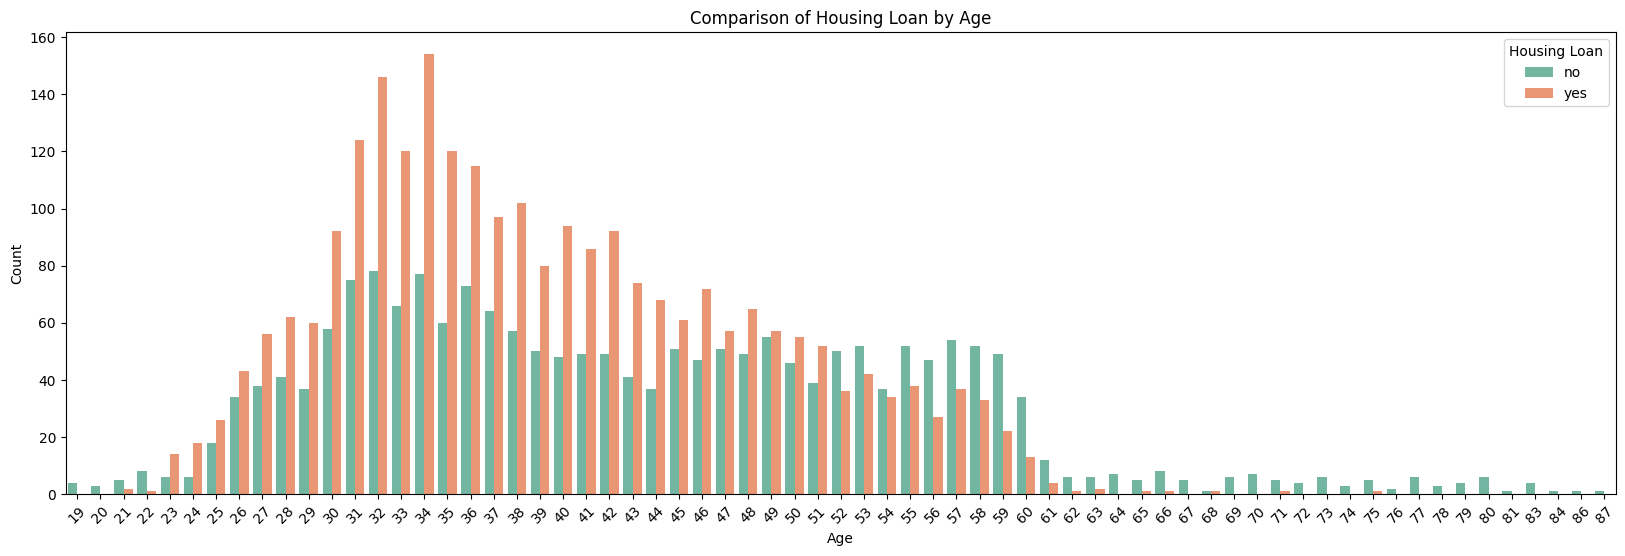

In [105]:
# Membuat Bar Chart untuk membandingkan kepemilikan housing loan dengan age
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='age', hue='housing', palette='Set2')
plt.title('Comparison of Housing Loan by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Housing Loan')
plt.xticks(rotation=45)
plt.show()

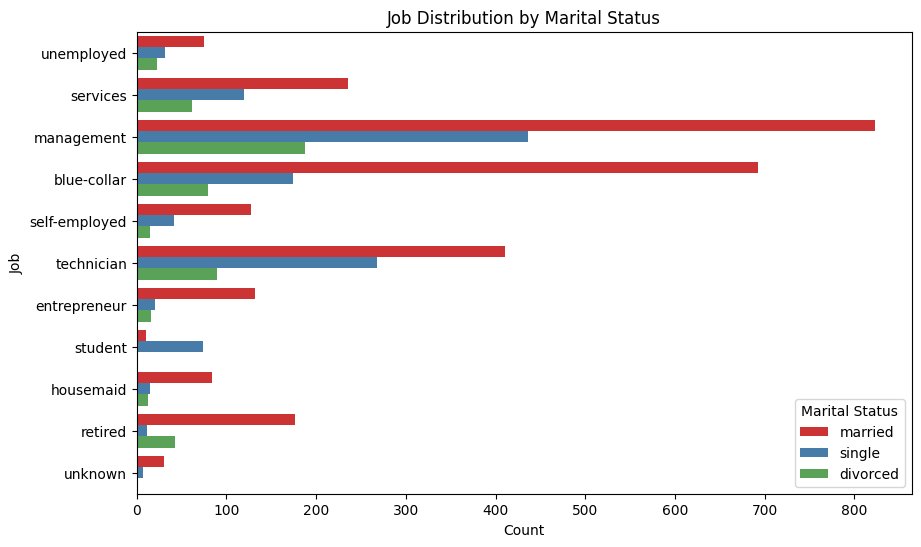

In [106]:
# Membuat Horizontal Bar Chart untuk distribusi pekerjaan berdasarkan status martial
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job', hue='marital', palette='Set1')
plt.title('Job Distribution by Marital Status')
plt.xlabel('Count')
plt.ylabel('Job')
plt.legend(title='Marital Status')
plt.show()

In [121]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.head()

# Mengubah string atau dan float menjadi interger

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,3,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,3,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,0,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


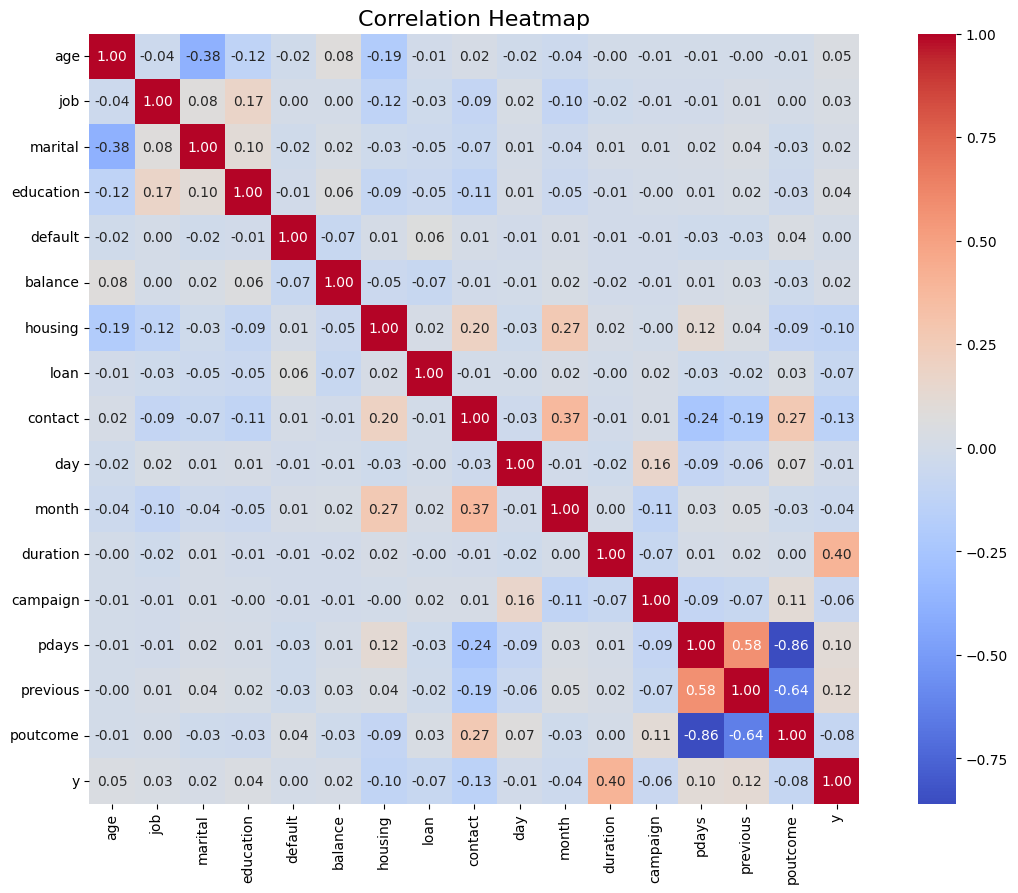

In [122]:
# Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Variabel Duration, pdays, dan previous memilki korelasi yang positif
# Variabel campaign, poutcome, dan y memiliki korelasi yang negatif
# Duration yang memiliki korelasi paling positif

## Machine Learning (Split Data)

In [107]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']
# disini saya menghapus beberapa variabel data X yang tidak diperlukan karena korelasinya kurang bagus

In [108]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

Class distribution after SMOTEEN:
y
no     2941
yes    2266
Name: count, dtype: int64


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# menggunakan 20% dari data untuk dijadikan test dan 80% untuk pelatihan

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# a. Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Model fitting
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# b. memprediksi hasil test y
y_pred_rf = rf_classifier.predict(X_test)

# c. mengecheck skor akurasi
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9942418426103646


In [112]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

#menunjukkan hasil atau akurasi dari testing dan training

Testing accuracy: 0.9942
Training accuracy: 1.0000


In [113]:
# d. Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)


Confusion Matrix Random Forest:
[[581   6]
 [  0 455]]


In [114]:
# e. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

          no       1.00      0.99      0.99       587
         yes       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# a. Defining the model
gb_model = GradientBoostingClassifier(random_state=42)

# Model fitting
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [116]:
# b. Predicting the test set
y_pred = gb_model.predict(X_test)

# c. Checking accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9788867562380038


In [117]:
# d. Confusion Matrix
cm_xg = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xg)


Confusion Matrix XGBoost:
[[570  17]
 [  5 450]]


In [118]:
# e. Classification Report
class_report_xg = classification_report(y_test, y_pred)

print("Classification Report Gradient Boosting: \n", class_report_xg)

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

          no       0.99      0.97      0.98       587
         yes       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



In [119]:
# Conclution
# Random Forest memiliki hasil yang sedikit lebih baik dibandingkan Gradient Boosting, dengan akurasi di atas 99%.
# Gradient Boosting juga merupakan model yang sangat baik dengan akurasi 98%, dan bisa menjadi pilihan untuk data predict di masa depan.
# Penggunaan teknik SMOTEEN (SMOTE dan Edited Nearest Neighbors) membantu memperbaiki ketidakseimbangan data, yang seringkali bisa meningkatkan performa model.